 In this module, EEG signals with standard electrode configuration of 19 spots on the head have been investigated:
 The focus of this piece of code will be in extracting meaningful measures from a network attributed to each person.
 This complex network will have measures such as betweenness, centrality, and clustering to name a few. 
 
 The report consists of firstly reading the data, then, defining meaningful hypothetical edges between channels through both static and dynamic techniques, and then extracting measures from these networks. 
 
 Finally, a t-test has been implemented to see if any meaningful difference exists between different age groups.
 Moreover, a very important measure called rewiring in the brain has been addressed. The following is the theme of the research:
 
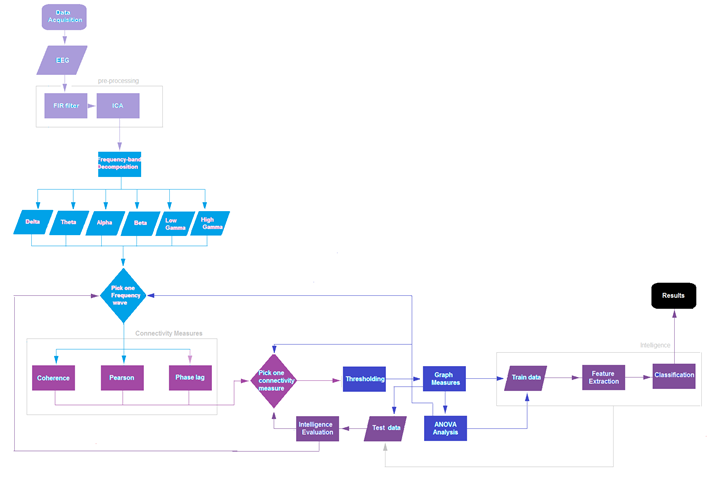
 

# Reading files

In this section of the code, we tried to read the EDF (European Data format).
Moreover, a static way to define graph from the spatial distribution of channels is tested:

In [ ]:

import pyedflib
import numpy as np
import pandas

data = pyedflib.EdfReader('Y:/train/TUSL/v1.0.1/edf/01_tcp_ar/025/00002521/s002_2006_03_01/00002521_s002_t001.edf')

#import first 19 channels one by one to a matrix
dt = np.zeros((80400,1))
for i in range(20):
	b = data.readSignal(i)
	b=b.reshape(80400,1)
	dt = np.c_[dt, b]
    
#delete first column of dt (extra zero column remain from initial matrix)
dt = np.delete(dt,0,1)
#convert to dataframe


df = pandas.DataFrame(dt,index=dt[:,0])
#calculate correlation as a dataframe 
            

# Complex theory and Connectivity definition

In the complexity theory, it is the correlation of different variables that matter to the analysis. 
According to this theory, organizations have complex structures in that they are dynamic networks of interactions, and their relationships are not aggregations of the individual static entities. The theory has been utilized in a variety of contexts and has been of high consideration to nature scientist. They have defined the concepts for neural activities in the brain. 
Brain has different levels of activationin including the interaction between cells, interaction between functional areas, and interaction between spatial positions. In this analysis, we are considering the interaction between different parts of the brain regardless of neural activities in micro levels and their functions. 

In [ ]:

df = pandas.DataFrame(dt,index=dt[:,0])
#calculate correlation as a dataframe 
corrdf = df.corr()
#convert correlation df to array
corrmat = corrdf.values
#calculate adjacency matrix
for i in range(20):
    for j in range(20):
        if corrmat[i,j]>0.90:
            corrmat[i,j]=1
        else:
            corrmat[i,j]=0
            
#convert adjacency matrix to dataframe
adjdf = pandas.DataFrame(corrmat,index=corrmat[:,0])     
#export adj matrix to csv file for using in excel
np.savetxt("Y:/train/testadj.csv", adjdf, delimiter="," , fmt='%s' , header='header')
            

In the following, we define another form of connectivity between different hypothetical nodes in the brain

In [ ]:

#another partial code
"""
Partial Correlation in Python (clone of Matlab's partialcorr)
This uses the linear regression approach to compute the partial 
correlation (might be slow for a huge number of variables). The 
algorithm is detailed here:
    http://en.wikipedia.org/wiki/Partial_correlation#Using_linear_regression
Taking X and Y two variables of interest and Z the matrix with all the variable minus {X, Y},
the algorithm can be summarized as
    1) perform a normal linear least-squares regression with X as the target and Z as the predictor
    2) calculate the residuals in Step #1
    3) perform a normal linear least-squares regression with Y as the target and Z as the predictor
    4) calculate the residuals in Step #3
    5) calculate the correlation coefficient between the residuals from Steps #2 and #4; 
    The result is the partial correlation between X and Y while controlling for the effect of Z
Date: Nov 2014
Author: Fabian Pedregosa-Izquierdo, f@bianp.net
Testing: Valentina Borghesani, valentinaborghesani@gmail.com
"""

import numpy as np
from scipy import stats, linalg

def partial_corr(C):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
    for the remaining variables in C.
    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable
    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """
    
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
        
    return P_corr






# Dynamic definition of the network

In the next section, instead of only imposing static correlation threshold for the hypothetical edges, we would use probability in a bonferroni adjusted test to define edges for our network. Based on this technique, each edge in all of our 

In [ ]:
# from statsmodels.sandbox.stats.multicomp import multipletests
import numpy as np
file='D:/DataaaaaaSetttttttt/CamCan/FromQuebecServer/corr/CC110045.dat.csv'
a = np.genfromtxt(file, delimiter=',')

p_adjusted = multipletests(a, alpha=0.05, method='bonferroni')
p_adjusted

#partial correlation
data = {'list 1':[2,4,6,8],'list 2':[4,16,36,64]}

import pandas as pd #To Convert your lists to pandas data frames convert your lists into pandas dataframes

df = pd.DataFrame(data, columns = ['list 1','list 2'])

from scipy import stats # For in-built method to get PCC

pearson_coef, p_value = stats.pearsonr(df["list 1"], df["list 2"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 


# Decomposition to frequency bands, network measure and their significancy

In the following, defined networks using the defined techniques for connectivity and thresholding are used. But before anything, the brain signals are decomposed into their frequency bands as follows:
Delta, theta, alpha, beta, low gamma, high gamma.

Like described in the schematic diagram in the beginning, the graphs will eventually yield some measures, each of which could be considered for ageing and detection of brain diseases such as dementia, seizure, and schizophrenia to name a few.

In [ ]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import os
import csv
import networkx 
from networkx import algorithms
from networkx.algorithms.distance_measures import diameter
from networkx.algorithms import efficiency,cluster,shortest_paths,centrality
from networkx.algorithms.efficiency import global_efficiency
from networkx.algorithms.cluster import average_clustering
from networkx.algorithms.shortest_paths import generic
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length
from networkx.algorithms.centrality import betweenness_centrality
from statsmodels.sandbox.stats.multicomp import multipletests
from scipy import signal

#read data, reshape, pick meggrads
gm=np.zeros((630,11))
k=0
names=[]
directory='/project/6005253/camcan_data/FinalData/'
#directory='D:/DataaaaaaSetttttttt/CamCan/FromQuebecServer/120008/'
for file in os.listdir(directory):
    with open(directory+file) as f: 
        a = np.fromfile(f, np.float32)
    print(file)
    a=a[0:(a.shape[0]-(a.shape[0]%310))] #To avoid indivisibility
    length=int(a.shape[0]/310)
    a=a.reshape(310,length)
    
    #frequency bands
    #freqs=0.1,4,8,14,30,60,120
    
    sos = signal.butter(5, [0.1,4], 'bp', fs=250, output='sos') #set manually
    freq_bands=signal.sosfilt(sos, a)
    freq_bands = freq_bands[2:307:3] #pick meggrad channels

    #Correlation
    adj=np.corrcoef(freq_bands)
    np.savetxt('/home/mazare/network/result/freq_band_net_measures/delta/deltacorr/delta'+file+'.csv', adj, delimiter=',')

    #Adjacency
    adj = multipletests(adj, alpha=0.05, method='bonferroni')
    adj=adj[0]

    #graph measures
    A = adj
    G = networkx.from_numpy_matrix(A)
    gm[k,4]=global_efficiency(G)
    gm[k,5]=average_clustering(G)
    gm[k,6]=average_shortest_path_length(G)
    bc=betweenness_centrality(G)
    gm[k,7]=bc[max(bc, key=bc.get)]
    betweenness_centrality(G)
    gm[k,8]=diameter(G)
    w, v = LA.eig(adj)
    energy=0
    for i in range(len(w)):
        energy=energy+abs(w[i])
    gm[k,9]=energy
	degree=np.array(list(degree(G).values())).mean()
    gm[k,10]=degree
    names.append(file)
    k+=1

df=pd.DataFrame({'Name':names, '1':gm[:,0], '2':gm[:,1], '3':gm[:,2], '4':gm[:,3], 'eff':gm[:,4], 'clu':gm[:,5], 'spl':gm[:,6], 'bcm':gm[:,7], 'dia':gm[:,8], 'ene':gm[:,9], 'deg':gm[:,10],})
df.to_excel('/home/mazare/network/result/freq_band_net_measures/delta/'+'delta'+'measure2.xlsx')
